# Project: Analyzing Macbeth

## Introduction
For our first day and first data science project, we're going to do some rudimentry analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists, condtionals and dictionaries, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Show mastery of the content covered in this section

### Getting the Data
Here we start by importing a python package and using it to pull the transcript of Macbeth from the project Gutenberg website. We also preview a few details about what is now stored in the variable macbeth; it's a string with 119,846 characters, the first 500 of which are printed below. 

In [47]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[:500])

<class 'str'>
119846
﻿***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************

This is our 3rd edition of most of these plays.  See the index.


Copyright laws are changing all over the world, be sure to check
the copyright laws for your country before posting these files!!

Please take a look at the important information in this header.
We encourage you to keep this file on your own disk, keeping an
electronic path open for the nex


In [48]:
# Let's import other tools that can help us to parse the text in Macbeth.
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# First, let's separate each word in the text by spaces " " between words.
words = macbeth.split()
# Test: 
print(words[:25]) 
type(words) #list

['\ufeff***The', 'Project', "Gutenberg's", 'Etext', 'of', "Shakespeare's", 'First', 'Folio***', '********************The', 'Tragedie', 'of', 'Macbeth*********************', 'This', 'is', 'our', '3rd', 'edition', 'of', 'most', 'of', 'these', 'plays.', 'See', 'the', 'index.']


list

In [50]:
# To avoid any potential complication later, we'll go ahead and make each element in our list lowercase. 
words = [word.lower() for word in words]
# Test:
words[:25]

['\ufeff***the',
 'project',
 "gutenberg's",
 'etext',
 'of',
 "shakespeare's",
 'first',
 'folio***',
 '********************the',
 'tragedie',
 'of',
 'macbeth*********************',
 'this',
 'is',
 'our',
 '3rd',
 'edition',
 'of',
 'most',
 'of',
 'these',
 'plays.',
 'see',
 'the',
 'index.']

In [51]:
# Now, let's remove punctuation (like commas) to ensure our results for word frequency are accurate.
# I used the 'maketrans' fxn here to create a mapping table.
table = str.maketrans('', '', string.punctuation)
# I then used the translate fxn to map our punctuation characters to '', removing them.
# I realized this method also removes hyphens etc. but haven't figured out a better method yet. Maybe isalpha()?
cleans = [w.translate(table) for w in words]
print(cleans[0]) # returns 'the' as first element in our list.
print(cleans[0:25]) # returns '\ufeffThe' for our first element instead of 'The' and I'm not sure why yet.

﻿the
['\ufeffthe', 'project', 'gutenbergs', 'etext', 'of', 'shakespeares', 'first', 'folio', 'the', 'tragedie', 'of', 'macbeth', 'this', 'is', 'our', '3rd', 'edition', 'of', 'most', 'of', 'these', 'plays', 'see', 'the', 'index']


In [52]:
# List of the characters we removed from our list with the previous block of code:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
# Let's do a quick check to see how many unique words we have in our text so far.
# To do that, we'll compare list vs. set.
allwordcount = print(len(cleans))
uniquewordcount = print(len(set(cleans)))

20347
4131


In [102]:
'''
SKIP
The following 2 blocks of code aren't complete and do not need to be run. 
I'm planning to test out this method later. My goal: Map each unique word to a key in a dictionary and count its occurence, saving the value to corresponding key. Let's eliminate those duplicates and then convert back to a list:
'''

'''
uniquewords = set(cleaned)
uniquewords = list(uniquewords)
'''

In [16]:
'''
ASK ABOUT THIS in 1ON1:
# To begin analysis, my first thought is to convert each word into a key with a corresponding value of its frequency.
# uniquedict = dict.fromkeys(uniquewords)
# uniquedict
'''

'\nASK ABOUT THIS in 1ON1:\n# To begin analysis, my first thought is to convert each word into a key with a corresponding value of its frequency.\n# uniquedict = dict.fromkeys(uniquewords)\n# uniquedict\n'

In [54]:
# Method 2:
# For this Method, I've created an empty dictionary and iterated over all 'cleaned'
# words from our list containing the text of Macbeth with a for-loop.
# Each apperance of a word increases the corresponding value for count.
wordcounts = {}
for clean in cleans:
    wordcounts[clean] = wordcounts.get(clean, 0) + 1
wordcounts

{'\ufeffthe': 1,
 'project': 35,
 'gutenbergs': 3,
 'etext': 33,
 'of': 426,
 'shakespeares': 6,
 'first': 22,
 'folio': 7,
 'the': 759,
 'tragedie': 7,
 'macbeth': 67,
 'this': 157,
 'is': 211,
 'our': 136,
 '3rd': 1,
 'edition': 3,
 'most': 28,
 'these': 34,
 'plays': 1,
 'see': 37,
 'index': 1,
 'copyright': 9,
 'laws': 2,
 'are': 89,
 'changing': 1,
 'all': 108,
 'over': 2,
 'world': 8,
 'be': 152,
 'sure': 6,
 'to': 460,
 'check': 3,
 'for': 138,
 'your': 138,
 'country': 6,
 'before': 23,
 'posting': 1,
 'files': 6,
 'please': 13,
 'take': 20,
 'a': 284,
 'look': 3,
 'at': 64,
 'important': 1,
 'information': 7,
 'in': 224,
 'header': 1,
 'we': 100,
 'encourage': 1,
 'you': 269,
 'keep': 2,
 'file': 8,
 'on': 70,
 'own': 1,
 'disk': 4,
 'keeping': 1,
 'an': 34,
 'electronic': 2,
 'path': 1,
 'open': 4,
 'next': 3,
 'readers': 3,
 'do': 53,
 'not': 181,
 'remove': 2,
 'welcome': 12,
 'free': 9,
 'plain': 3,
 'vanilla': 1,
 'texts': 1,
 'etexts': 15,
 'readable': 3,
 'by': 74,
 'bo

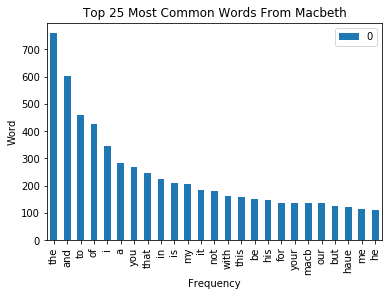

In [55]:
# Finally, let's graph our results for the top 25 most common words using help from pd and matplotlib.
wcs = pd.DataFrame.from_dict(wordcounts, orient = 'index')
# Let's sort our words in descending order based on appearance count.
wcs = wcs.sort_values(by = wcs.columns[0], ascending = False)
# Let's plot:
wcs.head(25).plot(kind='bar')
# plt.figure(figsize = (10, 10)) - For some reason this line isn't working.
plt.title('Top 25 Most Common Words From Macbeth')
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.show()

In [56]:
# Note: My results are slightly different from that of the lab because I removed punctuation from words.

In [50]:
'''
This code is unused currently.
import string
nopunct = macbeth.translate(macbeth.maketrans('', '', string.punctuation))
nopunct
'''

"\nThis code is unused currently.\nimport string\nnopunct = macbeth.translate(macbeth.maketrans('', '', string.punctuation))\nnopunct\n"

### Your Task

Your task is to create a bar graph of the 25 most common words in the Shakespeare's Macbeth.  


A common python programming pattern to counting objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `dictionary.get()` method is very useful in doing this. Read the docstring for the dictionary.get() method and use it along with the pseudocode above to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into a variable 'Macbeth'. Be sure to include a title and appropriate labels for your graph.

### Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create sub graphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

In [46]:
# I will come back to this after completing the remaining sections scheduled for the week.

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an intitial analysis of a classic text!